In [1]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from data_loader import get_merged_scores_df
from plots_helper import *

In [2]:
method_names = ['random_classifier', 'sift', 'polyphen2_HVAR', 'metarnn', 'revel', 'mvp', 'sequnet', 
           'cadd_raw', 'integrated_fitCons', 'phyloP17way_primate', 'phastCons17way_primate', 'bStatistic', 'conservation',
           'esm1b_t33_650M_UR50S', 'esm1v_t33_650M_UR90S', 'esm2_t33_650M_UR50D', 
           'prottrans_bert_bfd', 'prottrans_t5_xl_u50', 'vespa', 'proteinbert', 'protbert', 'unirep']

In [3]:
df = get_merged_scores_df("popu_freq", home_dir)
df = df[~pd.isna(df["conservation"]) & (df["class"]!="Singleton")]  # taking df for only non-NAN values
df["class"].value_counts()

Index(['snp_id', 'chrom_acc_version', 'chrom_pos', 'ref_allele', 'alt_allele',
       'prot_acc_version', 'prot_pos', 'wt', 'mut', 'wt_population',
       'mut_poulation', 'wt_freq', 'mt_freq', 'class', 'chrom', 'sift',
       'polyphen2_HVAR', 'metarnn', 'revel', 'mvp', 'cadd_raw',
       'integrated_fitCons', 'phyloP17way_primate', 'phastCons17way_primate',
       'bStatistic', 'n_methods_having_preds', 'esm1b_t33_650M_UR50S',
       'esm1v_t33_650M_UR90S', 'esm2_t33_650M_UR50D', 'prottrans_bert_bfd',
       'prottrans_t5_xl_u50', 'vespa', 'proteinbert', 'sequnet', 'protbert',
       'unirep', 'conservation'],
      dtype='object')
(26409, 37)
Common        6976
Ultra-rare    6957
Singleton     6955
Rare          5521
Name: class, dtype: int64


Ultra-rare    3027
Common        2658
Rare          2235
Name: class, dtype: int64

In [4]:
df["random_classifier"] = [random.uniform(0, 1) for i in range(df.shape[0])]

selected_cols_df = df[method_names].copy()
for i, method_name in enumerate(method_names):
    selected_cols_df[method_name]=(selected_cols_df[method_name]-selected_cols_df[method_name].min())/(selected_cols_df[method_name].max()-selected_cols_df[method_name].min()) # scaling prediction scores between [0, 1]

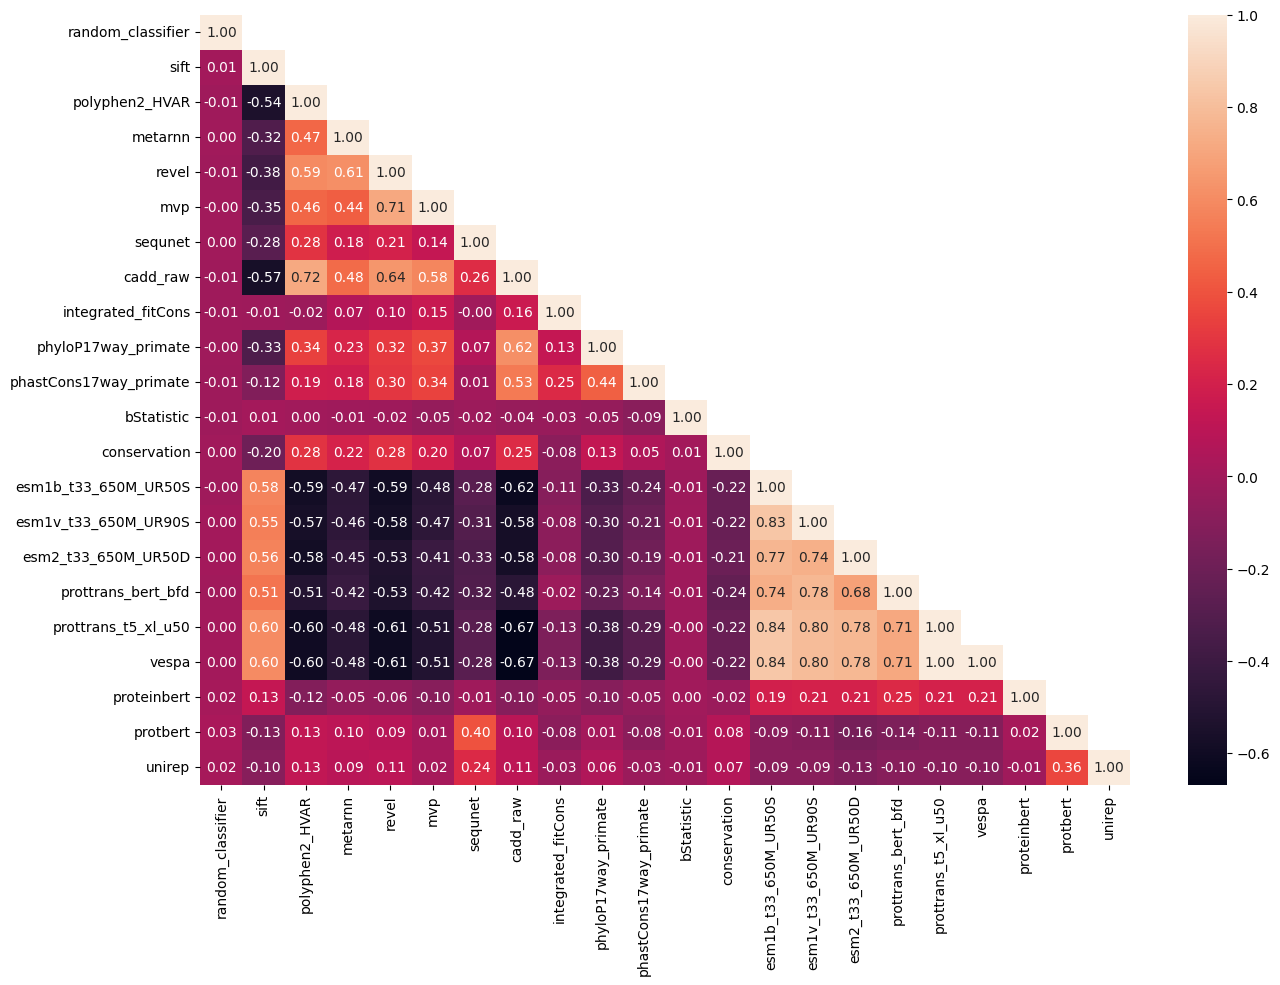

In [5]:
corr= selected_cols_df.corr()

mask = np.triu(np.ones_like(corr))
np.fill_diagonal(mask, False)

plt.figure(figsize=(15,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", mask=mask)
# plt.show()
plt.savefig(home_dir+f"models/aa_common/plots_methods_correlation/corr_on_popu_freq.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)